In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy 
import math
%matplotlib inline  

def max_insuline(arr):
    #print(arr)
    for n in range(len(arr)):
        if(arr[n] > 0):
            return (arr[n], n)
    return -1, -1

def find_idx(arr, val):
    for i in range(len(arr)):
        if(arr[i]-val<0.0001):
            return i
    return -1

In [375]:
cgm_date = ["CGMDatenumLunchPat"+str(i)+".csv" for i in range(1,6)]
cgm = ["CGMSeriesLunchPat"+str(i)+".csv" for i in range(1,6)]
insuline_basal = ["InsulinBasalLunchPat"+str(i)+".csv" for i in range(1,6)]
insuline_bolus = ["InsulinBolusLunchPat"+str(i)+".csv" for i in range(1,6)]
insuline_date = ["InsulinDatenumLunchPat"+str(i)+".csv" for i in range(1,6)]

In [376]:
# cgm_date vs cgm
CGM = [pd.read_csv("DataFolder/"+str(i), header=0, delimiter=',').fillna(method='bfill').to_numpy() for i in cgm]
CGM_date = [pd.read_csv("DataFolder/"+str(i), header=0).to_numpy() for i in cgm_date]
INSULINE_basal = [(pd.read_csv("DataFolder/"+str(i), header=0).fillna(0)).to_numpy() for i in insuline_basal]
INSULINE_bolus = [(pd.read_csv("DataFolder/"+str(i), header=0).fillna(0)).to_numpy() for i in insuline_bolus]
INSULINE_date = [pd.read_csv("DataFolder/"+str(i), header=0).to_numpy() for i in insuline_date]

In [378]:
def count(arr,val):
    #print(arr, val)
    c = 0
    for i in arr:
        if(i[0]==val):
            c += 1
    return c

def max_insuline_2(insuline):
    insuline = [list(i) for i in zip(*insuline)]
    Q,idx = max_insuline(insuline[0])
    return (Q, idx)

def max_meal_2(insuline):
    insuline = [list(i) for i in zip(*insuline)]
    Q,idx = max_insuline(insuline[0])
    return (Q, idx)

def column(matrix, i):
    return [row[i] for row in matrix]

def extract(cgm, time):
    for i in range(len(cgm)):
        if(cgm[i][1]>time):
            pass
        else:
            return cgm[:i]
    
data = []
c = 0
while(c<5):
    cgm_data = CGM[c]
    cgm_time = CGM_date[c]
    insuline_data = INSULINE_bolus[c]
    insuline_time = INSULINE_date[c]
    
    cgm = []
    #print("Length CGM_data:", len(cgm_data), "Len CGM_time:", len(cgm_time))
    for i in range(len(cgm_data)):
        temp = []
        for j in range(len(cgm_data[i])):
            temp.append([cgm_data[i][j], cgm_time[i][j]])
        cgm.append(temp)
    
    #print("Length insuline_data:", len(insuline_data), "Len insuline_time:", len(insuline_time))
    insuline = []
    for i in range(len(insuline_data)):
        temp = []
        for j in range(len(insuline_data[i])):
            temp.append([insuline_data[i][j], insuline_time[i][j]])
        insuline.append(temp)
        
    
    ##### cleaning for CGM data  #####
    #print("Before: \n",cgm[:5])
    l = len(cgm)
    i=0
    while(i<l):
        rowi = cgm[i]   # i th series
        count_na = count(rowi, 0)
        if(count_na>0):    # delete entries with NaN, also from other dataset
            print("count NaN:", count_na, "Row:",i)
            del(cgm[i])
            del(insuline[i])
            l -= 1
        else:
            i += 1
    #print("CGM \n",len(cgm))
    #print("CGM[0] \n",(cgm[0]))
    #print("CGM[0][0] \n",cgm[0][0])
    #### cleaning for insuline Data ###
    ###### not required.. I think...  #####
    
    #### Meal Point  ####
    meal = []
    for i in range(len(insuline)):
        index = column(insuline[i],0).index(max(insuline[i])[0])
        meal.append(insuline[i][index])
            
    #print(meal)
    
    #### plot the cleaned Data  #######
    """for i in range(len(cgm)):
        plt.figure()
        plt.plot(column(cgm[i], 1), column(cgm[i], 0))
        #for j in range(len(cgm[i])):
        #    plt.plot(cgm[i][j][1], cgm[i][j][0])
        plt.axvline(x=meal[i][1], color='black')
        plt.plot()
    """
    
    
    for i in range(len(cgm)):
        meal_time = meal[i][1]
        #print(meal_time, cgm[i],"\n---")
        temp = extract(cgm[i], meal_time) 
        #print(temp, "\n-------------\n")
        data.append(temp)
    c += 1
#print(len(data))
#print(len(data[0]))
#print(len(data[0][0]))


'print(len(data))\nprint(len(data[0]))\nprint(len(data[0][0]))'

In [115]:
final = []
for i in range(len(data)):
    temp = []
    for j in range(len(data[i])-1, -1, -1):
        temp.append(data[i][j][0])
    final.append(temp)
#for i in range(len(final)):
#    print(final[i], len(final[i]))

In [116]:
#####  binning (hyper glucoma/hypo glucoma)  ####
(minb, maxb) = (70, 140)
binning = []
for i in range(len(data)):
    temp = []
    hyper = 0
    hypo = 0
    normal = 0
    for j in range(len(data[i])-1, -1, -1):
        d = data[i][j][0]
        if(d<=minb):
            hypo += 1
        elif(d>minb and d<maxb):
            normal += 1
        else:
            hyper += 1
    total = hypo + normal +hyper
    binning.append([hypo/total, normal/total, hyper/total])


In [117]:
####   Root Mean Square  #####
rms = []
for i in range(len(final)):
    rms.append(np.sqrt(np.mean(np.square(final[i]))))
    

In [118]:
##### FFT   #####
fft = []
for i in range(len(final)):
    fft.append(np.fft.irfft(final[i], n=2))

In [154]:
#### Windowed mean ####
win_mean = []
for i in range(len(final)):
    temp = []
    n = math.ceil(len(final[i])/4)
    parts = [final[i][j: j+n] for j in range(0, len(final[i]), n)]
    for p in parts:
        mean = [np.mean(p)]
        temp.extend(mean)
    win_mean.append(temp)

#for i in range(len(win_mean)):
#    print(win_mean[i], len(win_mean[i]))

In [171]:
###  slope  ####
dist_max = []
for i in range(len(data)):
    temp = []
    indx = data[i].index(max(data[i]))
    x,y = data[i][indx], data[i][-1]
    dist = x[1]-y[1]
    dist_max.append(dist)
    

In [156]:
####  Range larger than standard deviation  #####
variance = []
K= [0.2, 0.25, 0.3, 0.35, 0.4]
for i in range(len(final)):
    temp = []
    s = np.std(final[i])
    for k in K:
        if(s> (max(final[i]) - min(final[i]))*k):
            temp.extend([1])
        else:
            temp.extend([0])
    variance.append(temp)


In [370]:
trf = pd.read_csv("trf.csv")
trf = trf.values.tolist()

In [451]:
for i in range(len(fft)):
    print(trf[i])

[721.0, 773.2916667000001, 60.0, 10.0, -52.29166667]
[856.0, 773.2916667000001, 60.0, -10.0, 82.70833333]
[677.0, 773.2916667000001, 60.0, -10.0, -96.29166667]
[704.0, 773.2916667000001, 60.0, -10.0, -69.29166667]
[732.0, 773.2916667000001, 60.0, 10.0, -41.29166667]
[755.0, 773.2916667000001, 60.0, 10.0, -18.29166667]
[726.0, 773.2916667000001, 60.0, 10.0, -47.29166667]
[706.0, 773.2916667000001, 60.0, -10.0, -67.29166667]
[704.0, 773.2916667000001, 60.0, -10.0, -69.29166667]
[714.0, 773.2916667000001, 60.0, 10.0, -59.29166667]
[792.0, 773.2916667000001, 60.0, 10.0, 18.70833333]
[698.0, 773.2916667000001, 60.0, -10.0, -75.29166667]
[741.0, 773.2916667000001, 60.0, 10.0, -32.29166667]
[718.0, 773.2916667000001, 60.0, 10.0, -55.29166667]
[732.0, 773.2916667000001, 60.0, 10.0, -41.29166667]
[736.0, 773.2916667000001, 60.0, 10.0, -37.29166667]
[760.0, 773.2916667000001, 60.0, 10.0, -13.29166667]
[901.0, 773.2916667000001, 60.0, -10.0, 127.70833329999999]
[771.0, 773.2916667000001, 60.0, 10

In [371]:
final_new = []
len_fft = len(fft[0])
len_bin = len(binning[0])
len_win_mean = len(win_mean[0])
len_var = len(variance[0])
len_trf = len(trf)

for i in range(len(fft)):
    temp = []  # fft[0], fft[1],  bin[0], bin[1], bin[2], wim_mean[0].. win_mean[3], variance, dist_to_max, rms
    
    for j in range(len_fft):  ## fft
        temp.append(fft[i][j])
        
    for j in range(len_bin):    ## binning
        temp.append(binning[i][j])
        
    for j in range(len(win_mean[i])):  # moving average
        temp.append(win_mean[i][j])
        
    for j in range(len(variance[i])):  # 
        temp.append(variance[i][j])
        
    for j in range(len(trf[i])):
        temp.append(trf[i][j])
    
    temp.append(dist_max[i])  # time difference
    temp.append(rms[i])   # rms
    
    final_new.append(temp)    

In [387]:
cols = ['FFT1','FFT2','Bin1','Bin2','Bin3',
                         'Moving Avg 1', 'Moving Avg 2', 'Moving Avg 3', 'Moving Avg 4','Range 1',
                         'Range 2', 'Range 3', 'Range 4', 'Range 5','Time until First meal',
                         'Mean of Meal times','Variance of Meal Times','Regularity in Meal','Deviation from Mean' ,'Time', 
                         'RMS']
pd.DataFrame(final_new, columns = cols).to_csv("file.csv")

In [394]:
train_features = final_new

model = PCA().fit(train_features)
X_pc = model.transform(train_features)

n_pcs= model.components_.shape[0]
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = ['FFT1','FFT2','Bin1','Bin2','Bin3',
                         'Moving Avg 1', 'Moving Avg 2', 'Moving Avg 3', 'Moving Avg 4','Range 1',
                         'Range 2', 'Range 3', 'Range 4', 'Range 5','Time until First meal',
                         'Mean of Meal times','Variance of Meal Times','Regularity in Meal','Deviation from Mean' ,'Time', 
                         'RMS']
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
df = pd.DataFrame(dic.items(), columns=['pc', 'feature'])
df['variance ratio'] = np.dot(model.explained_variance_ratio_.tolist(),100)
df['variance ratio'] = [float('%.5f'%i) for i in df['variance ratio']]

In [428]:
X_pc.shape
X_pc = np.array(X_pc)

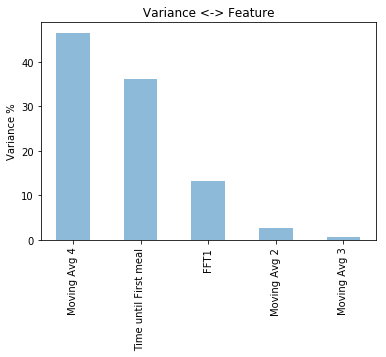

In [410]:
p=df.head(5)

objects = (p['feature'])
y_pos = np.arange(len(objects))
performance = p['variance ratio']

plt.bar(y_pos, performance, align='center', alpha=0.5, width = 0.5)
plt.xticks(y_pos, objects,rotation='vertical')
plt.ylabel('Variance %')
plt.title(' Variance <-> Feature ')

plt.show()

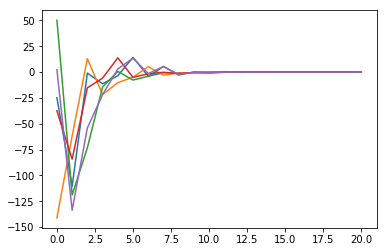

In [422]:
for i in most_important[:5]:
    plt.plot(np.arange(len(X_pc[i])),X_pc[i])

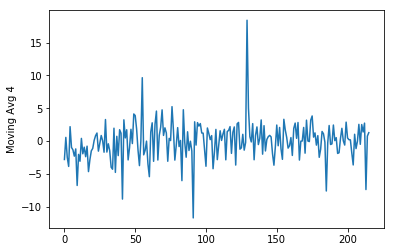

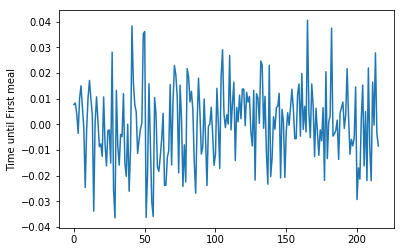

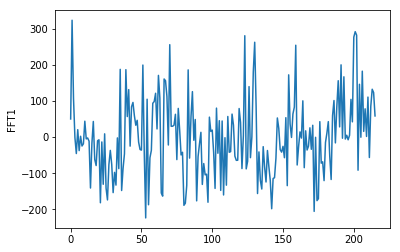

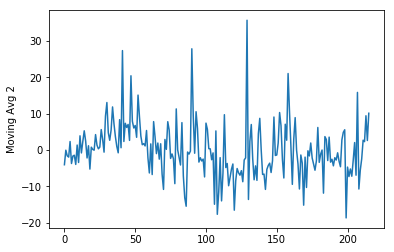

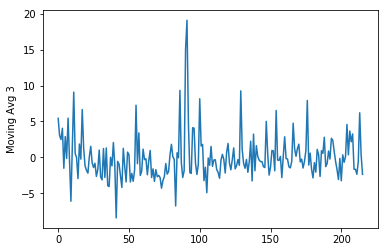

In [441]:
for i in most_important[:5]:
    #plt.figure()
    fig, ax = plt.subplots()
    xpc = X_pc[:,i]
    ax.plot(np.arange(len(xpc)),xpc)
    ax.set_ylabel(initial_feature_names[i])
plt.show()